In [56]:
from sys import path
import pandas as pd
import numpy as np

# Adding KELMOR.py to the path
path.append("KELMOR.py") # Replace . by the folder that contains KELMOR.py

# Import KELMOR module and class
kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

# Load the dataset
DKI5 = pd.read_excel("DATA ISPU - Normalization_Forecast.xlsx", sheet_name="DKI5")
X_train = DKI5.index.values.reshape(-1, 1)
y_train = DKI5['CO'].values.reshape(-1,)

gamma_value = 0.03
C_value=300

## Laplacian Kernel

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="laplacian", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI5['CO'].min()
max_par = DKI5['CO'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'CO': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI5['CO'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.084
MSE: 0.007
MAE: 0.067
R-Squared: -2.185
       Tanggal         CO
0   2022-11-30   8.955224
1   2022-12-01   9.104478
2   2022-12-02   9.701493
3   2022-12-03   9.850746
4   2022-12-04  10.447761
5   2022-12-05  10.895522
6   2022-12-06  11.194030
7   2022-12-07  11.940299
8   2022-12-08  12.089552
9   2022-12-09  12.238806
10  2022-12-10  12.686567
11  2022-12-11  12.835821
12  2022-12-12  13.432836
13  2022-12-13  13.582090
14  2022-12-14  13.582090
15  2022-12-15  14.179104
16  2022-12-16  14.598836
17  2022-12-17  14.925373
18  2022-12-18  15.671642
19  2022-12-19  15.820896
20  2022-12-20  15.820896
21  2022-12-21  15.970149
22  2022-12-22  16.268657
23  2022-12-23  16.417910
24  2022-12-24  16.716418
25  2022-12-25  16.716418
26  2022-12-26  17.014925
27  2022-12-27  17.164179
28  2022-12-28  17.164179
29  2022-12-29  17.910448


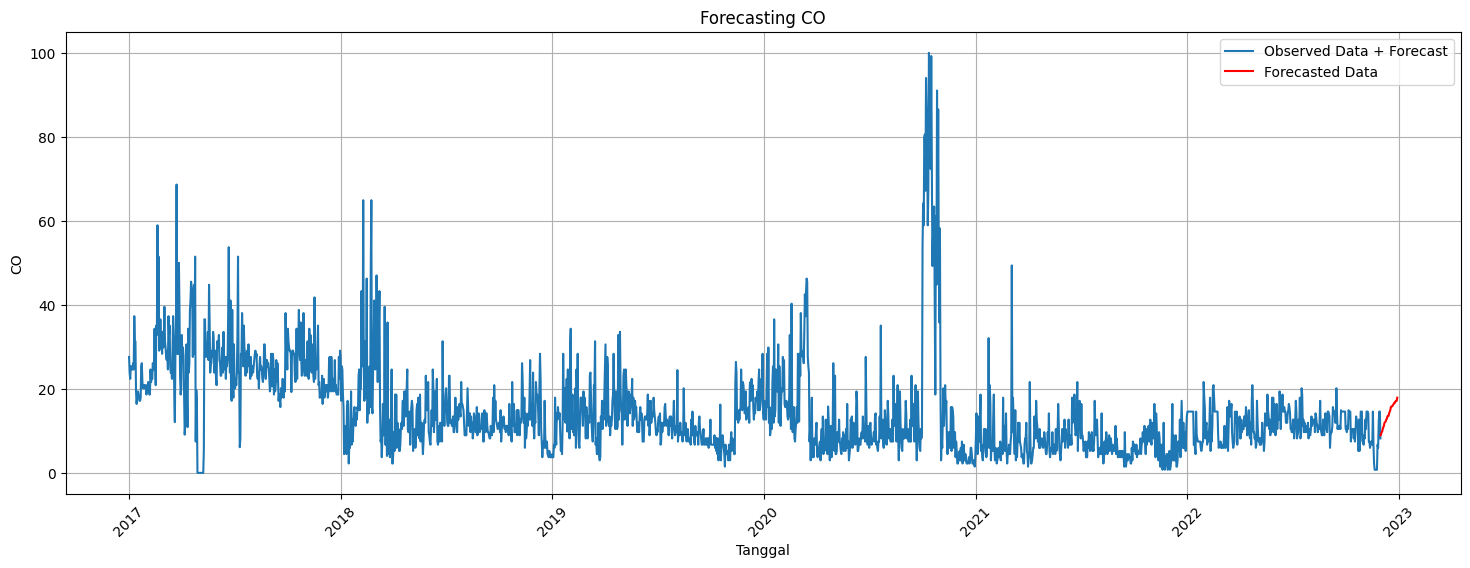

In [58]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'CO': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI5[['Tanggal', 'CO']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI5['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['CO'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('CO')
plt.title('Forecasting CO')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## RBF Kernel

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="rbf", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI5['CO'].min()
max_par = DKI5['CO'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'CO': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI5['CO'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.165
MSE: 0.027
MAE: 0.153
R-Squared: -11.438
       Tanggal         CO
0   2022-11-30   2.985075
1   2022-12-01   0.000000
2   2022-12-02   0.000000
3   2022-12-03   0.000000
4   2022-12-04   0.000000
5   2022-12-05   0.000000
6   2022-12-06   0.000000
7   2022-12-07   5.970149
8   2022-12-08  11.940299
9   2022-12-09  16.268657
10  2022-12-10  19.701493
11  2022-12-11  22.388060
12  2022-12-12  24.477612
13  2022-12-13  24.626866
14  2022-12-14  25.373134
15  2022-12-15  25.373134
16  2022-12-16  25.373134
17  2022-12-17  25.373134
18  2022-12-18  25.373134
19  2022-12-19  25.373134
20  2022-12-20  25.373134
21  2022-12-21  25.373134
22  2022-12-22  25.373134
23  2022-12-23  25.373134
24  2022-12-24  25.373134
25  2022-12-25  25.373134
26  2022-12-26  25.373134
27  2022-12-27  25.373134
28  2022-12-28  25.373134
29  2022-12-29  25.373134


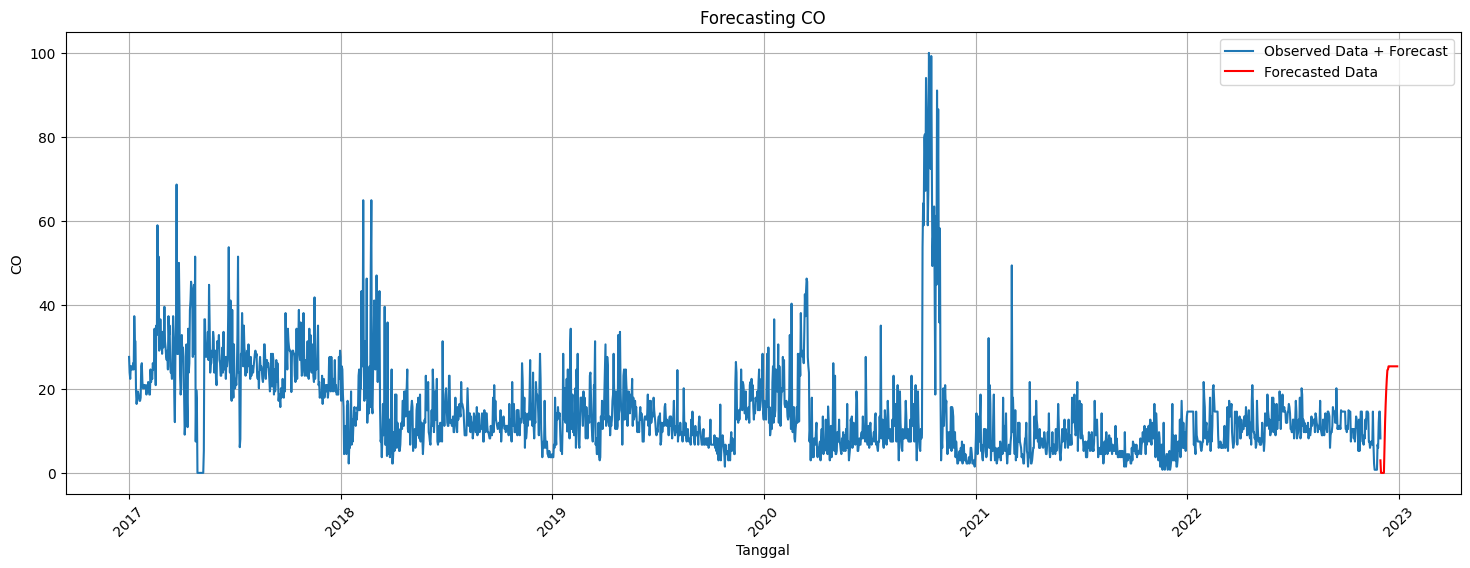

In [60]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'CO': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI5[['Tanggal', 'CO']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI5['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['CO'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('CO')
plt.title('Forecasting CO')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Linear

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="linear", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI5['CO'].min()
max_par = DKI5['CO'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'CO': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI5['CO'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.063
MSE: 0.004
MAE: 0.053
R-Squared: -0.792
       Tanggal        CO
0   2022-11-30  4.029851
1   2022-12-01  4.029851
2   2022-12-02  4.029851
3   2022-12-03  4.029851
4   2022-12-04  4.029851
5   2022-12-05  4.029851
6   2022-12-06  4.029851
7   2022-12-07  4.029851
8   2022-12-08  4.029851
9   2022-12-09  4.029851
10  2022-12-10  4.029851
11  2022-12-11  4.029851
12  2022-12-12  4.029851
13  2022-12-13  4.029851
14  2022-12-14  4.029851
15  2022-12-15  4.029851
16  2022-12-16  4.029851
17  2022-12-17  4.029851
18  2022-12-18  4.029851
19  2022-12-19  4.029851
20  2022-12-20  4.029851
21  2022-12-21  4.029851
22  2022-12-22  3.731343
23  2022-12-23  3.731343
24  2022-12-24  3.731343
25  2022-12-25  3.731343
26  2022-12-26  3.731343
27  2022-12-27  3.731343
28  2022-12-28  3.731343
29  2022-12-29  3.731343


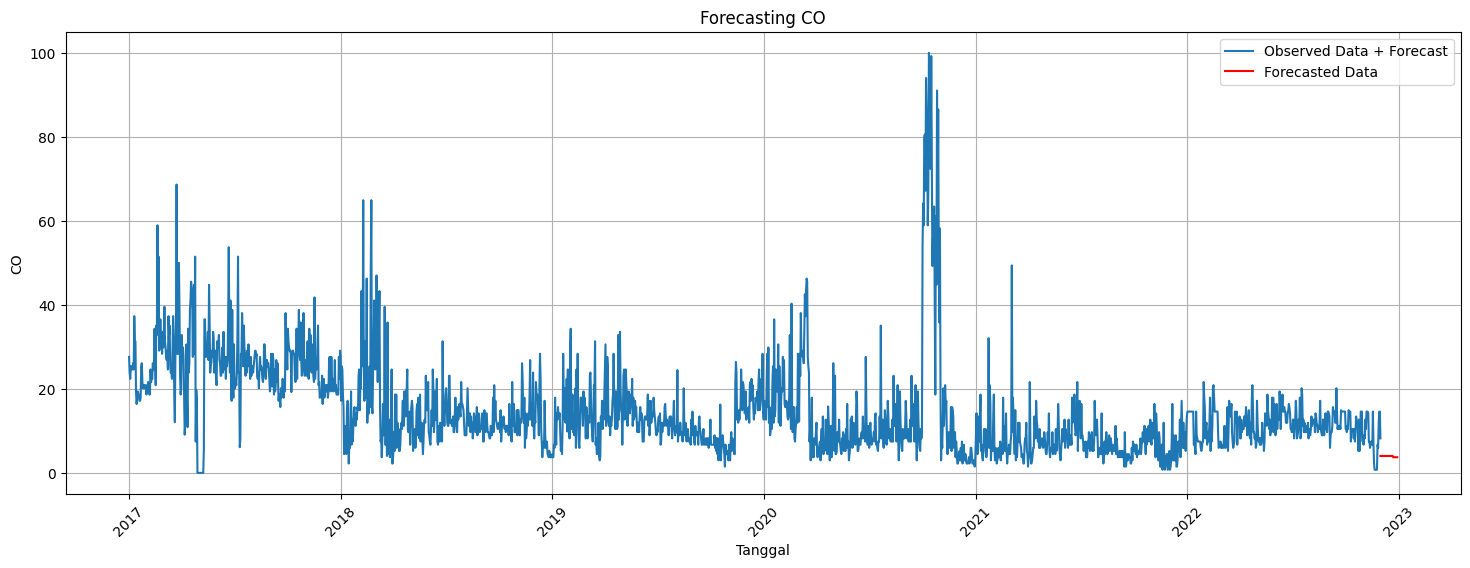

In [62]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'CO': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI5[['Tanggal', 'CO']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI5['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['CO'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('CO')
plt.title('Forecasting CO')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Sigmoid

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="sigmoid", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI5['CO'].min()
max_par = DKI5['CO'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'CO': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI5['CO'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.062
MSE: 0.004
MAE: 0.052
R-Squared: -0.775
       Tanggal         CO
0   2022-11-30  12.238806
1   2022-12-01  12.238806
2   2022-12-02  12.238806
3   2022-12-03  12.238806
4   2022-12-04  12.238806
5   2022-12-05  12.238806
6   2022-12-06  12.238806
7   2022-12-07  12.238806
8   2022-12-08  12.238806
9   2022-12-09  12.238806
10  2022-12-10  12.238806
11  2022-12-11  12.238806
12  2022-12-12  12.238806
13  2022-12-13  12.238806
14  2022-12-14  12.238806
15  2022-12-15  12.238806
16  2022-12-16  12.238806
17  2022-12-17  12.238806
18  2022-12-18  12.238806
19  2022-12-19  12.238806
20  2022-12-20  12.238806
21  2022-12-21  12.238806
22  2022-12-22  12.238806
23  2022-12-23  12.238806
24  2022-12-24  12.238806
25  2022-12-25  12.238806
26  2022-12-26  12.238806
27  2022-12-27  12.238806
28  2022-12-28  12.238806
29  2022-12-29  12.238806


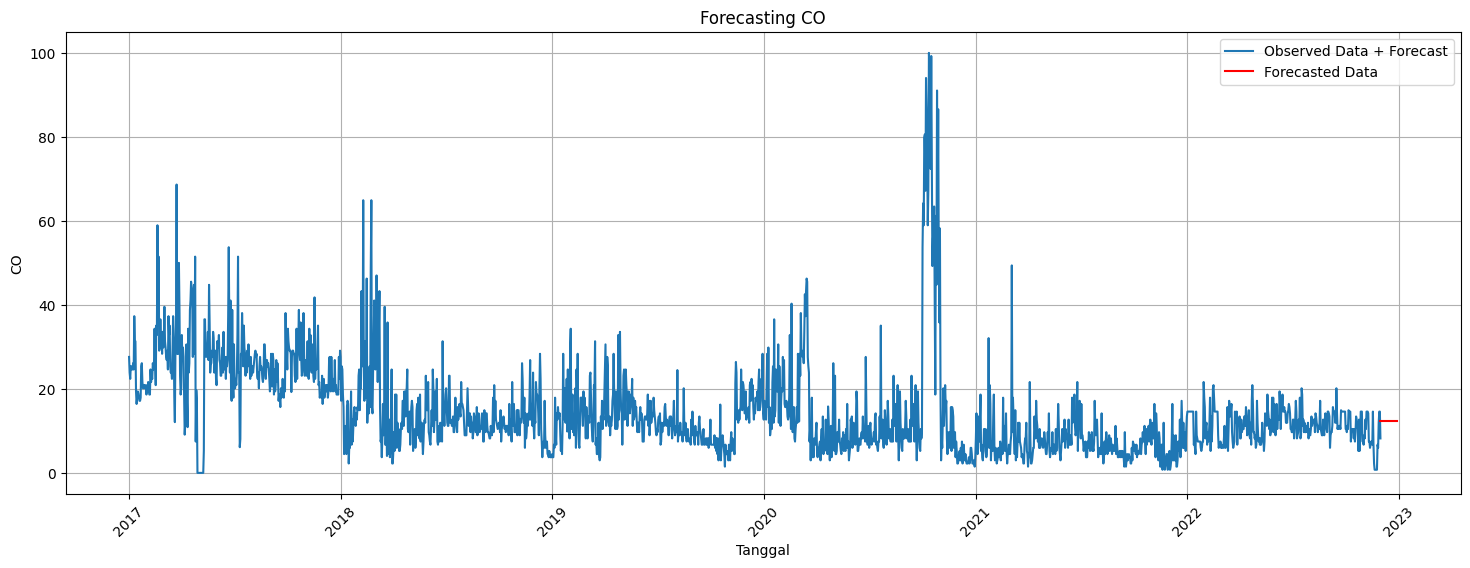

In [64]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'CO': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI5[['Tanggal', 'CO']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI5['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['CO'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('CO')
plt.title('Forecasting CO')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Cosine

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train KELMOR on the dataset
kelmor = KELMOR(C=C_value, kernel="cosine", gamma=gamma_value)
kelmor.fit(X_train, y_train)

# Generate future timestamps for forecasting
num_forecast = 30  # Number of samples to forecast
future_timestamps = np.arange(len(X_train), len(X_train) + num_forecast).reshape(-1, 1)

# Perform forecasting
y_pred = kelmor.predict(future_timestamps)

# Menampilkan min dan max partikel
min_par = DKI5['CO'].min()
max_par = DKI5['CO'].max()

# Denormalize
max_value = 100.0
min_value = 0.0

X_train_denorm = (y_train.flatten() * (max_value - min_value) + min_value)
prediksi_denorm = (y_pred.flatten() * (max_value - min_value) + min_value)

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
forecast_df = pd.DataFrame({'CO': prediksi_denorm})

result_df = pd.concat([pd.DataFrame({'Tanggal': tanggal_forecast}),forecast_df], axis=1)

# Calculate evaluation metrics
y_true = DKI5['CO'].values[-num_forecast:]
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the forecasted values and evaluation metrics
print("\nEvaluation Metrics:")
print("RMSE: %.3f" % rmse)
print("MSE: %.3f" % mse)
print("MAE: %.3f" % mae)
print("R-Squared: %.3f" % r2)
print(result_df)


Evaluation Metrics:
RMSE: 0.065
MSE: 0.004
MAE: 0.054
R-Squared: -0.952
       Tanggal         CO
0   2022-11-30  12.686567
1   2022-12-01  12.686567
2   2022-12-02  12.686567
3   2022-12-03  12.686567
4   2022-12-04  12.686567
5   2022-12-05  12.686567
6   2022-12-06  12.686567
7   2022-12-07  12.686567
8   2022-12-08  12.686567
9   2022-12-09  12.686567
10  2022-12-10  12.686567
11  2022-12-11  12.686567
12  2022-12-12  12.686567
13  2022-12-13  12.686567
14  2022-12-14  12.686567
15  2022-12-15  12.686567
16  2022-12-16  12.686567
17  2022-12-17  12.686567
18  2022-12-18  12.686567
19  2022-12-19  12.686567
20  2022-12-20  12.686567
21  2022-12-21  12.686567
22  2022-12-22  12.686567
23  2022-12-23  12.686567
24  2022-12-24  12.686567
25  2022-12-25  12.686567
26  2022-12-26  12.686567
27  2022-12-27  12.686567
28  2022-12-28  12.686567
29  2022-12-29  12.686567


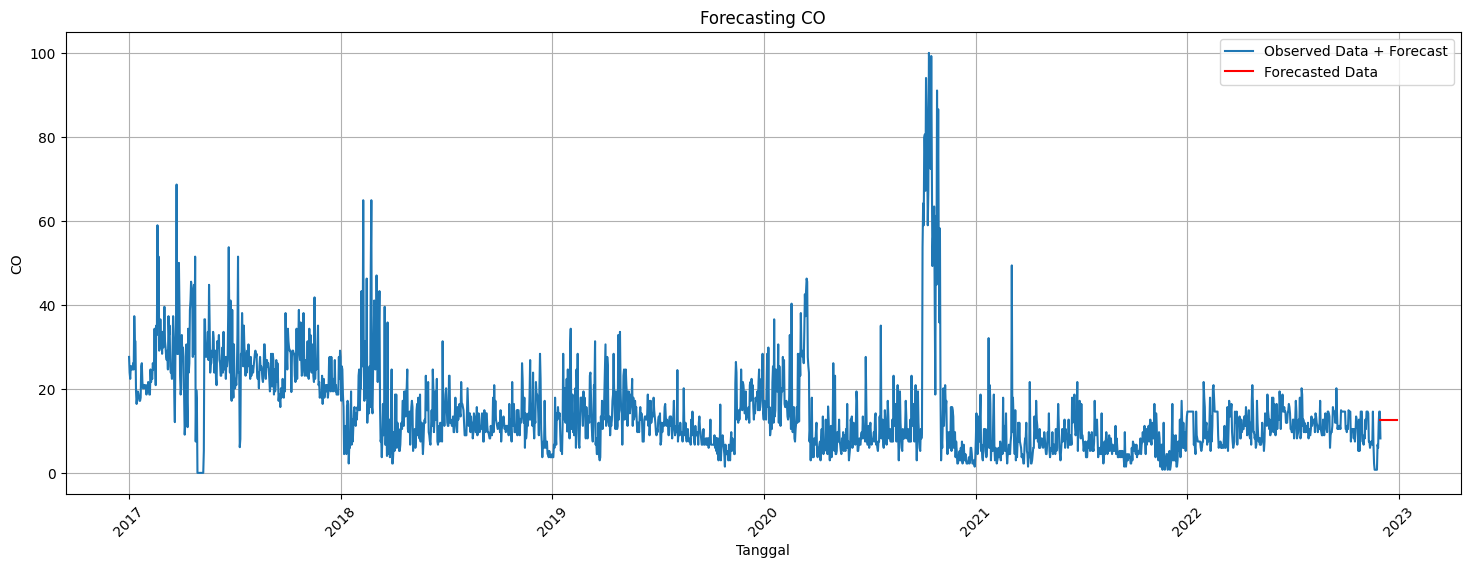

In [66]:
import matplotlib.pyplot as plt

# Create a DataFrame to display the forecasted values
tanggal_asli = pd.DataFrame({'Tanggal Asli': DKI5['Tanggal'].loc[X_train.flatten()].values})
tanggal_forecast = pd.date_range(start=tanggal_asli['Tanggal Asli'].iloc[-1], periods=num_forecast, freq='D').strftime('%Y-%m-%d')
tanggal_forecast_dt = pd.to_datetime(tanggal_forecast)
forecast_df = pd.DataFrame({'Tanggal': tanggal_forecast, 'CO': prediksi_denorm})

# Combine original data with forecasted data
combined_df = pd.concat([DKI5[['Tanggal', 'CO']], forecast_df])


# Plot the combined data
plt.figure(figsize=(18, 6))

plt.plot(DKI5['Tanggal'], X_train_denorm, label='Observed Data + Forecast')
plt.plot(tanggal_forecast_dt, prediksi_denorm, label='Forecasted Data', color='r')
#plt.scatter(forecast_df['Tanggal'], forecast_df['CO'], color='red', label='Forecasted Data')
plt.xlabel('Tanggal')
plt.ylabel('CO')
plt.title('Forecasting CO')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
